# Online Food Ordering Prediction

In [1]:
# libraries

import numpy as np
import warnings
import random
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

# pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("../input/online-food-delivery-preferencesbangalore-region/onlinedeliverydata.csv")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


I won't use all the features.The dataset I'll use contains these information:

- the age of the client
- marital status of the client
- occupation of the client
- monthly income of the client
- educational qualification of the client
- family size of the client
- latitude and longitude of the location of the client
- pin code of the residence of the client
- did the client order again (Output)
- remarks on the most recent order (Positive or Negative)

In [3]:
data = data[["Age","Gender", "Marital Status","Occupation", "Monthly Income", "Educational Qualifications",
             "Family size","latitude", "longitude", "Pin code","Output"]].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 33.5+ KB


In [4]:
data.isnull().sum() # no empty values

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
dtype: int64

# Data Analysis with Visualization

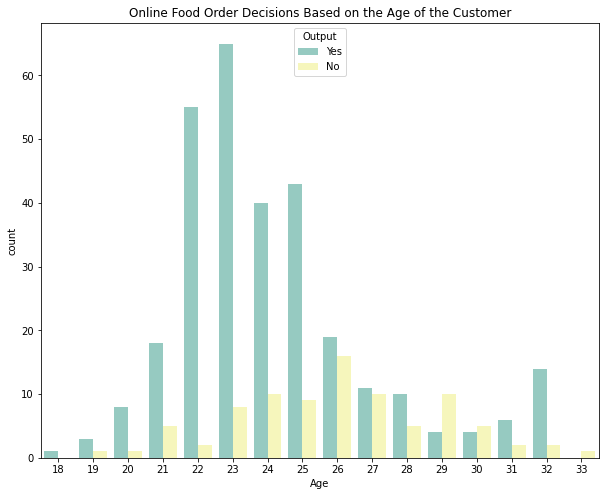

In [5]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.countplot(x='Age',data=data,hue='Output',palette="Set3");

While the <b>Output</b> is '*Yes*' in the 22-25 age range, the <b>Output</b> is mostly '*No*' for 29-year-old users. This indicates that online food delivery companies specifically target these age groups(22-25 age range).

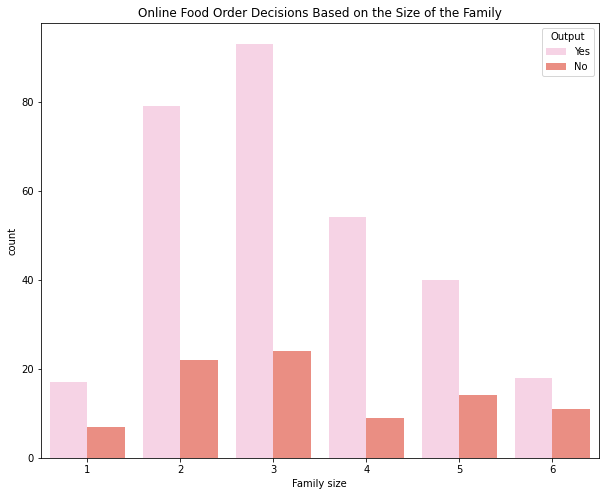

In [6]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.countplot(x='Family size',data=data,hue='Output',palette="Set3_r");

Families of 2-3 people order more food. These families can also be groups of friends.

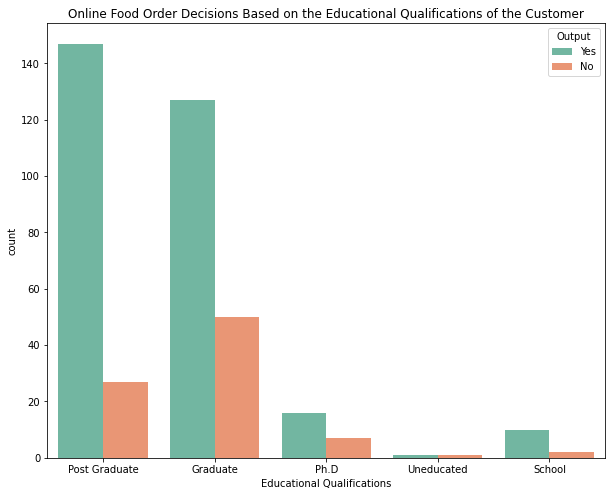

In [7]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Educational Qualifications of the Customer")
sns.countplot(x='Educational Qualifications',data=data,hue='Output',palette="Set2");

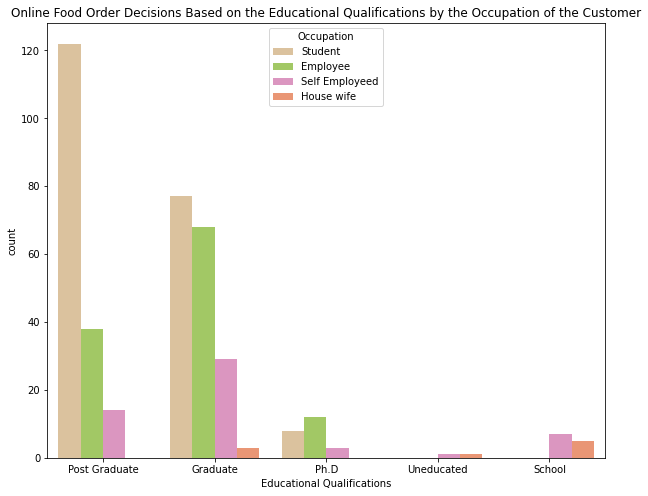

In [8]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Educational Qualifications by the Occupation of the Customer")
sns.countplot(x='Educational Qualifications',data=data,hue='Occupation',palette="Set2_r");

The vast majority of students who place orders are pursuing a master's degree. The majority of graduates are either students or employees. In this case, the first priority of companies should be students.

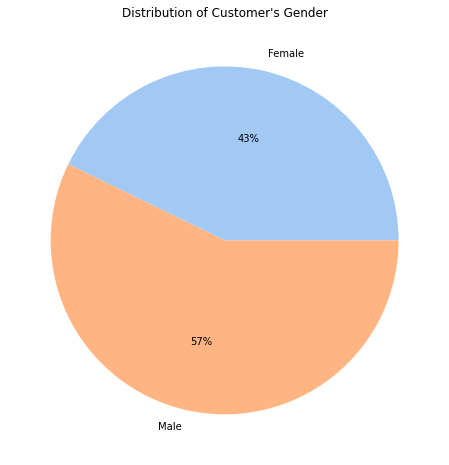

In [9]:
female = len(data[data["Gender"] == 'Female'])
male = len(data[data["Gender"] == 'Male'])
data_gender = [female,male]
labels = ['Female', 'Male']

colors = sns.color_palette('pastel')[0:5] # seaborn color palette to use

plt.figure(figsize=(10,8))
plt.title("Distribution of Customer's Gender")
plt.pie(data_gender, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

The number of male customer in the data is slightly higher than the number of female customer. Let's look at the distribution of occupation and gender and reordering by gender.

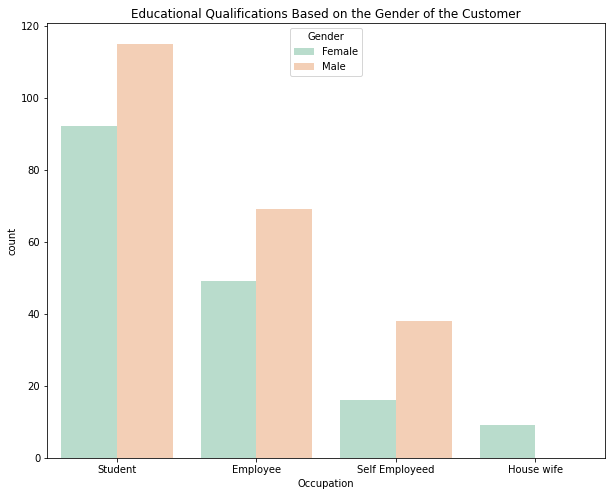

In [10]:
plt.figure(figsize=(10,8))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x='Occupation',data=data,hue='Gender',palette="Pastel2");

The number of male students is higher than the number of female students. There may be many reasons for this. The main reason may be gender roles supported by social norms.

#### Which gender is most like to order again ?

In [11]:
reorder = data[data["Output"] == "Yes"]
gender_data = reorder['Gender'].value_counts()
label = gender_data.index
counts = gender_data.values

colors = sns.color_palette('pastel')[2:4]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text = "Which Gender is More Likely to Order Online Again?")
fig.update_traces(hoverinfo="label+percent", textinfo="value",marker=dict(colors=colors))

fig.show()

58% of male customer tend to reorder, compared to 41% of female customers.

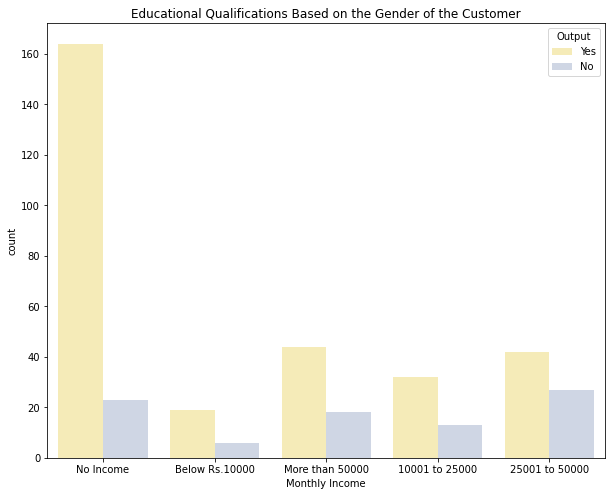

In [12]:
plt.figure(figsize=(10,8))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x='Monthly Income',data=data,hue='Output',palette="Pastel2_r");

We see that those with no income(**54%**) have a higher rate of reordering compared to not placing an order. The main reason for this may be that the majority of the customers are *students* and have no income.

In [13]:
reorder = data[data["Output"] == "Yes"]
status_data = reorder['Marital Status'].value_counts()
label = status_data.index
counts = status_data.values

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text = "What is the Marital Status of Customers?")
fig.update_traces(hoverinfo="label+percent", textinfo="value",marker=dict(colors=colors))

fig.show()

About 76% of customers who order are *married*.

positive = len(data[data["Feedback"] == 'Positive'])
negative = len(data[data["Feedback"] == 'Negative '])
data_feedback = [positive,negative]
labels = ['Positive', 'Negative']

colors = sns.color_palette('pastel')[0:5] # seaborn color palette to use

plt.figure(figsize=(10,8))
plt.title("Percentages of the Customer's Feedback")
plt.pie(data_feedback, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Of the total comments, 82% are positive while 18% are negative. So how does this rate affect reordering(**Output**)?

plt.figure(figsize=(10,8))
plt.title("Does Feedback Have Any Effect On Reordering?")
sns.countplot(x='Feedback',data=data,hue='Output',palette="Pastel1");

As can be seen from the plot, the majority of customers with positive feedback will order again, while customers with negative feedback are more likely to not order.

# Preparing the Data

In [14]:
data["Monthly Income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [15]:
data["Gender"] = data["Gender"].map({"Male":0,"Female":1}) # male or female

data["Marital Status"] = data["Marital Status"].map({"Married":0,"Single":1,"Prefer not to say":2})


data["Occupation"] = data["Occupation"].replace(to_replace=["Employee","Self Employeed"], value=1) # employed
data["Occupation"] = data["Occupation"].replace(to_replace=["Student","House wife"], value=0) # unemployed


data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})


data["Monthly Income"] = data["Monthly Income"].replace(to_replace=["No Income"], value=0) # no income
data["Monthly Income"] = data["Monthly Income"].replace(to_replace=["Below Rs.10000",
                                                                   "More than 50000",
                                                                   "25001 to 50000",
                                                                   "10001 to 25000"], value=1)  # has an income
                                                                             
#data["Feedback"] = data["Feedback"].map({"Negative ":0,"Positive":1}) # negative or positive

data["Output"] = data["Output"].map({"No":0,"Yes":1}) # no or yes

# Prediction Model

In [16]:
X = data.drop('Output',axis=1)
y = data['Output']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=101)

print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (310, 10)
Shape of test dataset :  (78, 10)


In [17]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

print(rfc.score(X_test, y_test))

0.8846153846153846


[[10  1]
 [ 8 59]]


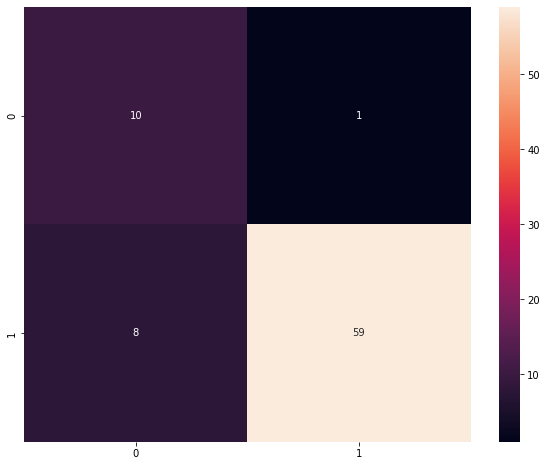

In [18]:
pred = rfc.predict(X_test)

print(confusion_matrix(pred,y_test))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(pred,y_test), annot=True);

In [19]:
# Evaluating a score by cross-validation
# cv determines the cross-validation splitting strategy
scores = cross_val_score(rfc, X_train, y_train,cv=5)

# average score
print("Accuracy: ", scores.mean(), scores.std() * 2)

Accuracy:  0.867741935483871 0.06255070783763


# Parameter Search

In [20]:
parameters = {
    'randomforestclassifier__n_estimators': (20, 50, 100)
}

pipeline = make_pipeline(RandomForestClassifier())

pipeline

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [21]:
gridsearch = GridSearchCV(pipeline, parameters, verbose=1, n_jobs= -1)

In [22]:
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': (20, 50, 100)},
             verbose=1)

In [23]:
print("Best score %0.3f" % gridsearch.best_score_)
print("Best parameters set: ")
best_parameters = gridsearch.best_estimator_.get_params()

for params in sorted(parameters.keys()):
    print("\t%s: %r" % (params, best_parameters[params]))

Best score 0.874
Best parameters set: 
	randomforestclassifier__n_estimators: 20


# Given the following customer, would this person order?

In [24]:
r = random.randint(0,len(data))
print(r)
new_customer = data.drop('Output', axis=1).iloc[r]
new_customer

273


Age                               24.0000
Gender                             1.0000
Marital Status                     0.0000
Occupation                         1.0000
Monthly Income                     1.0000
Educational Qualifications         2.0000
Family size                        2.0000
latitude                          12.9561
longitude                         77.5921
Pin code                      560027.0000
Name: 273, dtype: float64

In [25]:
rfc.predict(new_customer.values.reshape(1,10)) # predicted output

array([1])

In [26]:
data.iloc[r]['Output'] # actual Output

1.0